<h3><strong>Washington State EV Adoption & Infrastructure</strong></h3>
<small>
  <p> by Divya Shah, Manan Patel, Rushil Patel, Kathan Parikh, Rishi Shah </p>  
  <p> This project investigates why some regions in Washington State adopt electric vehicles (EVs) more rapidly than others. By integrating three datasets EV registration data, county median income, and EV charging station locations. The stakeholders of this project are policymakers, urban planners, and environmental advocates. These stakeholders guide investments in charging infrastructure which helps support higher EV adoption, they support efforts to expand EV accessibility across different regions in Washington and they also create incentive programs that encourage sustainable transportation and contribute in reducing carbon emissions and promoting clean enery use. </p>  
    <strong>Why this Project?</strong> We chose EV adoption in Washington because of the rapid growth of EVs present both an environmental opportunity and an infrastructure challenge. By combining the vehicle registrations, charging stations, and income data, we can pinpoint the economical and infrastructure gaps that are slowing down EV adoption. Our findings will be very useful for policymakers to target incentives and charging investments to accelerate EV adoption. </p>
  </p>
  <p>
    We hypothesize that counties with higher median household incomes and greater public charging station density will register significantly more EVs and where both income and station counts are in the top tiers, adoption is especially strong. 
  </p>
</small>

<h3>Data Cleaning</h3>
<small>
  Our cleaning process focused on three main datasets, and we show clearly how we cleaned our data:
</small>

<h4>EV Registration Data</h4>
<small>
<p><a href="https://data.wa.gov/Demographics/Electric-Vehicles-By-County/smxa-ttv3">Link to the dataset</a></p>
  <ul style="margin-top:0;">
    <li><strong>Structure:</strong> Individual vehicle records (VIN, County, City, Model Year, Make, Model, Electric Range, Electric Vehicle Type).</li>
    <li><strong>Scope:</strong> Covers all EV registrations in Washington State from a specific snapshot date.</li>
    <li><strong>Size & Type:</strong> ~200K Rows; mix of numeric, categorical, and geospatial data.</li>
    <li><strong>Transformations:</strong>
    We removed all the duplicate records from the dataset, trimmed the whitespace in the "County" column to make it standardized and converted the "Electric Range" to a numeric data type.
    </li>
    <li><strong>Missing Values:</strong>There are missing electric range values but we handle them during the aggregation and they get ignored while doing any mean calculations</li>
  </ul>
</small>

<h4>Median Income Data</h4>
<small>
<p> <a href="https://ofm.wa.gov/washington-data-research/economy-and-labor-force/median-household-income-estimates">Link to the dataset</a></p>
  <ul style="margin-top:0;">
    <li><strong>Structure:</strong> Provides median income figures for each county in Washington.</li>
    <li><strong>Scope:</strong> Annual income data for each county.</li>
    <li><strong>Size & Type:</strong> 39 rows (one per county) of numeric and categorical data.</li>
    <li><strong>Transformations:</strong> Trimmed the county names and renamed income columns to a standard format.</li>
    <li><strong>Missing Values:</strong> We have verified that there are no missing values in this dataset.</li>
  </ul>
</small>

<h4>Charging Stations Data</h4>
<small>
<p> <a href="https://ev-station-grants-wacommerce.hub.arcgis.com/datasets/3d6352112603498094aa694e7888ae86_0/explore?layer=1&location=46.510096%2C-120.565948%2C6.90">Link to the dataset</a></p>
  <ul style="margin-top:0;">
    <li><strong>Structure:</strong> Contains details on charging station locations, facility types, available ports, accessibility, and geo coordinates.</li>
    <li><strong>Scope:</strong> Represents all public EV charging stations in Washington State at data collection.</li>
    <li><strong>Size & Type:</strong> The dataset contains approximately 1950 rows and data types includes numeric, text, and geospatial coordinates.</li>
    <li><strong>Missing Values:</strong> We dropped the rows which had missing Latitude/Longitude </li>
    <li><strong>Transformations:</strong> We trimmed whitespace from the County field and standardized it and also aggregated the data to compute station counts per county. </li>
  </ul>
</small>  

<h4>Merging</h4>  
<small><p>After all of the cleaning is done, we start merging the datasets. First we join the EV data with Income data by performing an inner join on the County column. After that we join the result with the charging stations data through a left join on the County column and fill missing values and NaN with zeroes. This gives us a unified dataset which contains key EV metrics that is grouped by county and the data is now ready for analysis.</p></small>  

<small>The code block below imports all the functions from the data_cleaning.py script and calls the appropriate functions to load, clean, and merge all datasets. The first 5 rows of the final dataset is displayed at the end</small>

In [1]:
from data_cleaning import (load_datasets, clean_ev_data, aggregate_ev_data, clean_income_data, get_station_counts, clean_stations_data, merge_data)

ev_path = "Electric_Vehicle_Population_Data_20250327.csv"
income_path = "Median Income.csv"
stations_path = "Public_EV_Charging_Stations_With_County.csv"

df_ev, df_income, df_stations = load_datasets(ev_path, income_path, stations_path)  # Load data
df_income = clean_income_data(df_income)  # Clean Income Data                                   
df_ev = clean_ev_data(df_ev) # Clean EV Data
ev_agg = aggregate_ev_data(df_ev)
df_stations = clean_stations_data(df_stations) # Clean Stations Data
stations_counts = get_station_counts(df_stations)
merged_df = merge_data(ev_agg, df_income, stations_counts) # Merge the cleaned and aggregated data on the 'County' column

display(merged_df.head())  # Display final merged DataFrame

County  EV_Count  Avg_Electric_Range Most_Common_Make  \
0       King    118711           45.805709            TESLA   
1     Kitsap      7901           46.984179            TESLA   
2   Thurston      8595           48.254799            TESLA   
3  Snohomish     28814           42.291045            TESLA   
4     Yakima      1499           50.140093            TESLA   

  Most_Common_Electric_Vehicle_Type  Station_Count  2024_Median_Income  \
0    Battery Electric Vehicle (BEV)         1023.0           125484.57   
1    Battery Electric Vehicle (BEV)           39.0           104271.31   
2    Battery Electric Vehicle (BEV)           65.0            96316.80   
3    Battery Electric Vehicle (BEV)          106.0           110905.05   
4    Battery Electric Vehicle (BEV)           33.0            71426.63   

   2023_Median_Income  2022_Median_Income  2021_Median_Income  \
0           119925.74            116044.0            110351.0   
1            96931.47             93794.0             86826.0   
2            91522.39             88560.0             81544.0   
3           104833.23            101440.0             99650.0   
4            65167.33             63058.0             60058.0   

   2020_Median_Income  
0            102620.0  
1             76814.0  
2             79769.0  
3             93589.0  
4             56353.0

### Machine Learning & Statistical Analysis

#### Technique 1: Linear Regression<small>  
We used ordinary least squares regression to predict county‑level EV_Count from three predictors - <code>2024_Median_Income</code>, <code>Station_Count</code>, and <code>Avg_Electric_Range</code>    

**Procedure:**  
We first filled any missing feature values with zero to provide stability. After that we split the data into features (which is X) and target (which is y). Then we computed a baseline that predicts the mean EV count for every County and then finally trained a linear model on the entire dataset.

**Inferences:**  
The Baseline Mean Squared Error (MSE) we got is ≈ 3.67×10⁸. We then compare the Baseline MSE results with Regression MSE results which was 5.72×10⁶. Because the Regression MSE is much lower than the baseline MSE, it shows that our model explains the vast majority of the variance. We then computed the coefficient of determination (R-Squared) = 0.984 confirming a 98.4% reduction in error when compared to the naive mean predictor.  
  
**Coefficients:**  
  - <code>2024_Median_Income:</code> +0.147 EVs per $1 (≈ +147 EVs per $1 000), confirming that wealthier counties often register more EVs.  
  - <code>Station_Count:</code> +108.84 EVs per station, showing that counties with strong infrastructure often register more EVs.  
  - <code>Avg_Electric_Range:</code> –50.02 EVs per mile, because higher average range often reflects expensive, low volume premium EVs, counties with many of those luxury models register fewer total vehicles, leading to a negative range coefficient.
</small>

In [2]:
from ml_analysis import print_regression_summary

print_regression_summary(merged_df)

Baseline MSE: 367334545.5
Regression MSE: 5719793.3
R²: 0.984
Coefficients:
  Income: 0.147
  Stations: 108.835
  Avg_Range: -50.023


#### Technique 2: K‑Means Clustering  
<small>
We used K‑Means clustering to segment counties by these three standardized features - <code>EV_Count</code>, <code>2024_Median_Income</code>, and <code>Station_Count</code>. In order to find K, we used the "elbow" method and we also computed a Within Cluster Sum of Squares (WCSS) which quantifies how tightly clustered points are around their respective cluster centers.

**Procedure:**  
First we begin by computing the WCSS values for different K-values. For this project we are analyzing about 39 counties so we decided to pick K-values between 1 and 6. Our computation for the various WCSS values for K-values 1 through 6 is done in a python script ml_analysis.py. We are calling the function plot_elbow below which first computes the WCSS for K=1 to K=6 and then plots it on the graph. After examining the graph it seems that K=3 would be the most ideal choice because there is very less reduction after K=3. To confirm that K=3 is the most optimal K-value, we compute the total percentage of reduction from K=1 to the most optimal K-value by using the print_elbow_summary function which finds the most optimal K-value based on a drop threshold of 5% meaning that if the WCSS a K-value doesn't drop more than 5% from the previous K-value then that is the most optimal K-value.

**Inferences:**
The inferences of the clustering analysis are shown in the output of the below code block. Through the elbow method we can clearly conclude that the K=3 is the most optimal K-value for our dataset. We can now use this information to group the counties into 3 different clusters to uncover trends about EV registration counts and median income along with the station counts.
</small>


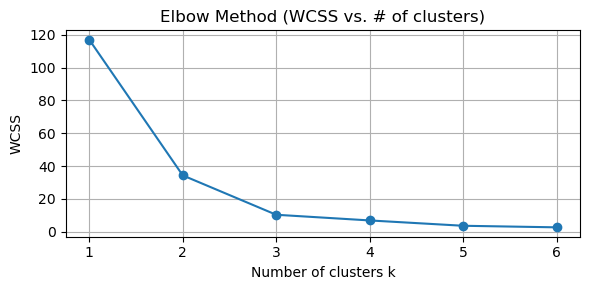

 k |  WCSS   |  Variance Explained
---|---------|----------
 1 |     117 |     0.0%
 2 |      34 |    70.7%
 3 |      10 |    91.2%
 4 |       7 |    94.1%
 5 |       4 |    96.9%
 6 |       3 |    97.7%

 Elbow detected at k = 3, explaining 91.2% of variance


In [3]:
from ml_analysis import print_elbow_summary, plot_elbow

plot_elbow(merged_df, max_k=6)

optimal_k = print_elbow_summary(merged_df, max_k=6, drop_threshold=0.05)

### Visualizations

#### Visualization 1: Scatter Plot with Regression Line<small>  
This visual plots the county level EV registrations and charging station counts against median income for 2024. Along with that, it also plots a fitted regression line against median income. We can see a clear upward trend in both the EV registrations and charging infrastructures as the income rises suggesting that wealthier counties are strongly associated with greater EV adoption and more charging stations.
</small>

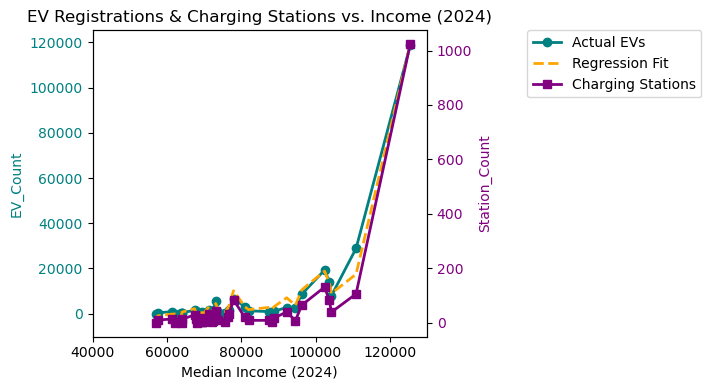

In [4]:
from ml_analysis import plot_ev_and_stations_vs_income

plot_ev_and_stations_vs_income(merged_df)

#### Visualization 2: Ridge Plot<small>  
This plot shows the distribution of actual predicted EV_Count for counties grouped by charging station count qunitiles where Q1 has counties with fewest stations and Q5 has the counties with th most stations. Each of the ridge's peak indicates whether the model overpredicted or underpredicted for that group. From the visual we can see that counties in Q1 are underpredicted and in Q5 it overpredicts which means that our model works best with mid range station counts but struggles at the extremes.
</small>

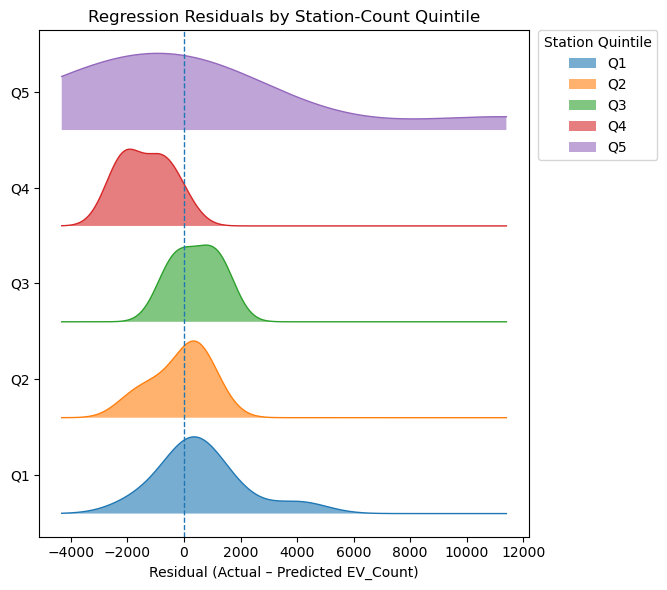

In [5]:
from ml_analysis import plot_residuals_ridge_by_station_quintile

plot_residuals_ridge_by_station_quintile(merged_df, n_quintiles=5)

#### Visualization 3: Cluster Assignment Scatter<small>  
This plot shows the K-Means clustering of Washington counties by their EV counts and median income, and the bubble sizes are proportionate to the bubble size. The centroids of each clusters are marked with an 'X' and labeled with high, low, and medium adoption. According to the visual, high adoption counties have high income, many EV stations, and the most EVs; mid adoption counties have moderate income, EV stations, and EV registrations; and low adoption counties have the lower income, very few stations, and least number of EVs. These metrics clearly indiciate clear targets for tailored policy and investment.
</small>

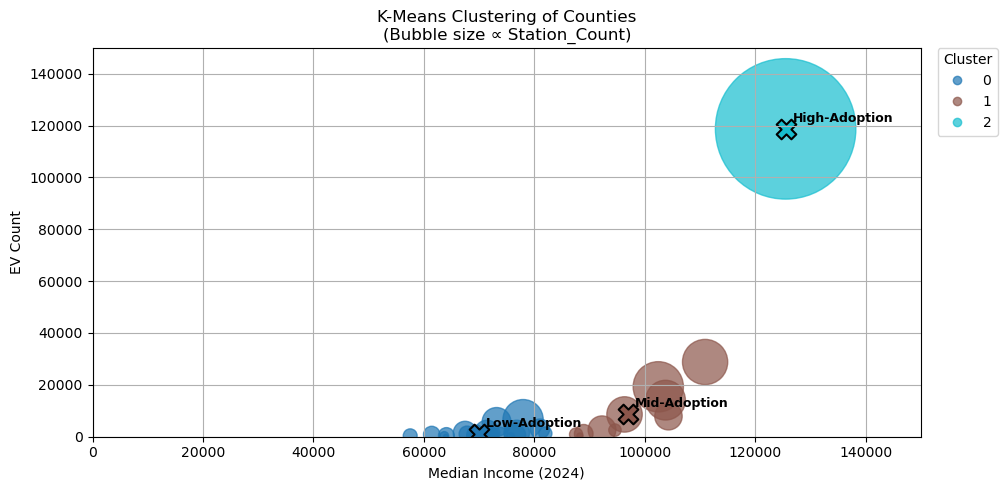

In [6]:
from ml_analysis import perform_clustering, plot_kmeans_clusters

clusterd_df = perform_clustering(merged_df, optimal_k)
plot_kmeans_clusters(clusterd_df, optimal_k)

### Results

1. **Regression fit (R² = 0.984):**  
   <small>Our regression model explains **98.4%** of the variation in county level EV counts. Each extra public charging station is associated with about **109** additional EV registrations, so placing new stations in low infrastructure counties like Yakima and Benton will yield the largest absolute gains.</small>

2. **Income effect (~147 EVs per $1 000):**  
   <small>A **$1000** rise in median household income corresponds to roughly **147** more EV registrations. Likewise, this suggests that mid income counties (around $80 000–$100 000) could see the biggest boost from targeted financial incentives such as rebates or tax credits.</small>

3. **Clustering insights (k = 3):**  
   <small>Our K-Means clustering splits counties into **low**, **mid**, and **high** adoption groups. Thus, high adoption counties pair top tier incomes with many chargers; mid adoption counties have moderate incomes and infrastructure but lag in registrations; and low adoption counties sit at the bottom on both fronts. This pattern indicates that combining outreach and new charging stations will help mid adoption counties move up to high adoption.</small>

4. **Our Recommendation (Actionable dashboard):**  
   <small>We recommend stakeholders (state agencies, utilities, and local governments) to implement an interactive dashboard that tracks `EV_Count`, `Station_Count`, and the model’s monthly residuals to operationalize these findings. Policymakers and utilities can use it to spot underperforming counties in real time and direct investments where they’ll drive the greatest increase in EV uptake.</small>